In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from IPython.display import Math, Latex

# Interpolación con intervalos

Con la interpolación de Lagrange y Newton hemos interpolado todos los nodos con un polinomio. Ahora modificaremos esto, haciendo más precisa la interpolación. 

Aproximaremos con una función distinta, entre punto por punto, es decir, a cada dos nodos los aproximaremos con su propio polinomio y repetiremos para los nodos dados, teniendo n-1 polinomios distintos. A esto es a lo que le llamamos *Interpolación por intervalos*

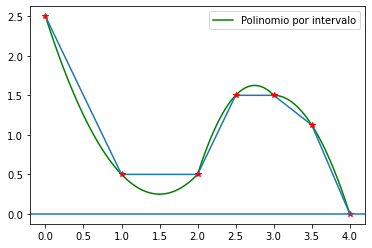

In [2]:
from scipy.interpolate import lagrange

datx = [0, 1, 2, 2.5, 3, 3.5, 4]
daty = [2.5, 0.5, 0.5, 1.5, 1.5, 1.125, 0]
dat_intervalos = [(np.linspace(datx[2*i], datx[2*i + 2]),
                   lagrange(datx[2*i:2*i+3], daty[2*i:2*i+3]) ) 
                  for i in range((len(datx) - 1) // 2) ]

l = {"label": "Polinomio por intervalo"}
for xr_sub, poly in dat_intervalos:
    plt.plot(xr_sub, poly(xr_sub), "g", **l)
    l = {}
    
plt.plot(datx, daty)
plt.plot(datx, daty, "r*")
plt.axhline()
plt.legend();

La interpolación por intervalos también se llama interpolación por Splines

### Ejercicio
¿Ya habías utilizado la interpolación por Splines? Si es así, indica para que clase y/o proyecto lo habías utilizado

In [3]:
#### Respuesta ####

## Spline cúbico
Tenemos un conjunto de puntos $\{x_i\}$ con
$$
a \leq x_1 \leq x_2 \leq \dots \leq x_n \leq b
$$
para unos $a$ y $b$ fijos. En muchos casos usamos $[a, b] = [x_1, x_n]$. Un *spline cúbico* $s(x)$ en $[a, b]$ con nodos $\{x_i\}$ tiene las propiedades:
1. En los intervalos 
  $$
  [a, x_1], [x_1, x_2], \dots, [x_{n-1}, x_n], [x_n, b]
  $$
  $s(x)$ es polinomio de grado $\leq 3$.
2. $s(x)$, $s'(x)$, $s''(x)$ son continuos en $[a, b]$.

Con $(x_1, y_1), \dots, (x_n, y_n)$. Llamamos a $s(x)$ como *spline cúbico interpolante* cuando
$$
s(x_i) = y_i, \qquad, i = 1, \dots, n
$$

### Ejemplo
$f(x) = 1/x$.

In [4]:
inv_x = np.linspace(1, 4, 4)
inv_y = 1/inv_x
inv_df = pd.DataFrame([inv_x, inv_y], index = ["$x$", "$y$"])
inv_df

,0,1,2,3
$x$,1.0,2.0,3.000000,4.00
$y$,1.0,0.5,0.333333,0.25


En este caso, cada polinomio $P(x)$ a través del que construimos los Splines en [m,n] tiene grado 3. Esto quiere decir, que va a tener la forma $$P(x)=ax^{3}+bx^{2}+cx+d$$.

En este caso vamos a tener cuatro incógnitas por cada intervalo $(a,b,c,d)$, y una nueva condición para cada punto común a dos intervalos, respecto a la segunda derivada, implicando:

1. Que las partes de la función a trozos $P(x)$ pasen por ese punto. Es decir, que las dos $P_{n}(x)$ que rodean al $f(x)$ que queremos aproximar, sean igual a la función en cada uno de estos puntos.
2. Que la derivada en un punto siempre coincida para ambos "lados" de la función definida a trozos que pasa por tal punto común.
3. Que la segunda derivada en un punto siempre coincida para ambos "lados" de la función definida a trozos que pasa por tal punto común.

Como puede deducirse al compararlo con el caso de polinomios cuadráticos, ahora no nos va a faltar una sino dos ecuaciones (condiciones) para el número de incógnitas que tenemos. La forma de solucionar esto, determina el carácter de los splines cúbicos. Por lo que definimos:

1. Splines cúbicos naturales: La forma más típica. La derivada segunda de $P$ se hace 0 para el primer y último punto sobre el que está definido el conjunto de Splines, esto son, los puntos $m$ y $n$ en el intervalo [m,n]. También se requiere dar los valores de la segunda derivada de $m$ y $n$ de forma *manual*,  en el conjunto de splines definidos en el intervalo [m,n]. Hacer iguales los valores de la segunda derivada segunda de $m$ y $n$ en el conjunto de splines definidos en el intervalo [m,n].

2. Splines cúbicos sujetos: La primera derivada de $P$ debe tener el mismo valor que la primera derivada de la función para el primer y último punto sobre el que está definido el conjunto de Splines, esto son, los puntos m y n en el intervalo [m,n].

### Condiciones de frontera naturales

$$
s''(x_1) = 0, \qquad s''(x_n) = 0
$$

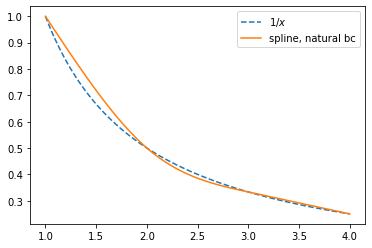

In [5]:
from scipy.interpolate import CubicSpline
inv_x = np.linspace(1, 4, 4)
inv_y = 1/inv_x
inv_nat = CubicSpline(inv_x, inv_y, bc_type="natural")
inv_xr = np.linspace(1, 4, 100)

plt.plot(inv_xr, 1/inv_xr, "--", label="$1/x$")
plt.plot(inv_xr, inv_nat(inv_xr), label="spline, natural bc");
plt.legend();

# Condiciones de frontera: Splines cúbicos sujetos a la misma curvatura

$$
s''(x_1) = y''_1, \qquad s''(x_n) = y''_n
$$

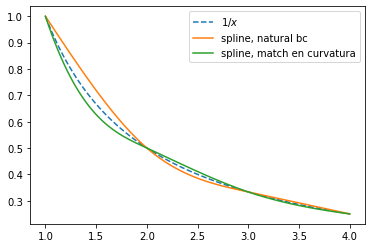

In [6]:
inv_curv = CubicSpline(inv_x, inv_y, bc_type=((2, 2), (2, 1/32)))
# plot

plt.plot(inv_xr, 1/inv_xr, "--", label="$1/x$")
plt.plot(inv_xr, inv_nat(inv_xr), label="spline, natural bc");
plt.plot(inv_xr, inv_curv(inv_xr), label="spline, match en curvatura");
plt.legend();

## Splines en 2-d

Podemos usar la función bisplrep. Esta función toma un arreglo x,y,z que prepresenta puntos en la superficie $z=f(x,y)$.

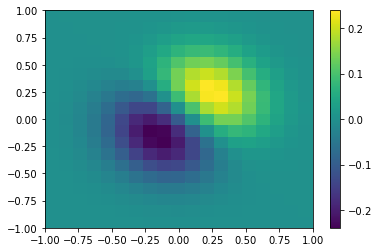

In [7]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x, y = np.mgrid[-1:1:20j, -1:1:20j] #mallado de 20x20
#Hacemos un mañado en x de -1 a 1 con 20 elementos y 
#lo mismo en y (una cuadrícula que iremos pintando 
#la función )
z = (x+y) * np.exp(-6.0*(x*x+y*y))
plt.figure()
plt.pcolor(x, y, z) # se cambia los colores en función de 
#x, y, y z
plt.colorbar() #la barra de color de la derecha
plt.show()

Interpolamos la función sobre un mallado nuevo de 70x70

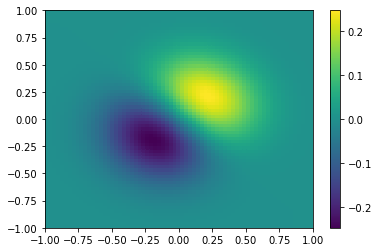

In [8]:
xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
tck = interpolate.bisplrep(x, y, z,s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)
plt.figure()
plt.pcolor(xnew, ynew, znew)
plt.colorbar()
plt.show()

## Tarea:
    
    Del artículo de Interpolación Baricentrica de Lagrange, hacer un resumen, con tus propias palabras, de la página 501 a la 510. (No incluir la sección 8).